In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial']
})

[1.00155, 1.04702, 1.07747, 1.05775, 1.01748, 1.08751, 1.07873, 1.05652, 1.02639, 1.05721, 1.03933, 1.04446, 1.0549, 1.0002, 1.04768, 1.05255, 1.06952, 1.03537, 1.04414, 1.41841, 2.21097, 2.18507, 2.18042, 2.18189, 2.1839, 2.16368, 2.18198, 2.16319, 2.20104, 2.16196, 2.2008, 2.22042, 2.16306, 2.18183, 2.14308, 2.18141, 2.16261, 2.16279, 2.18156, 2.18102, 2.21322, 2.17243, 2.15331]


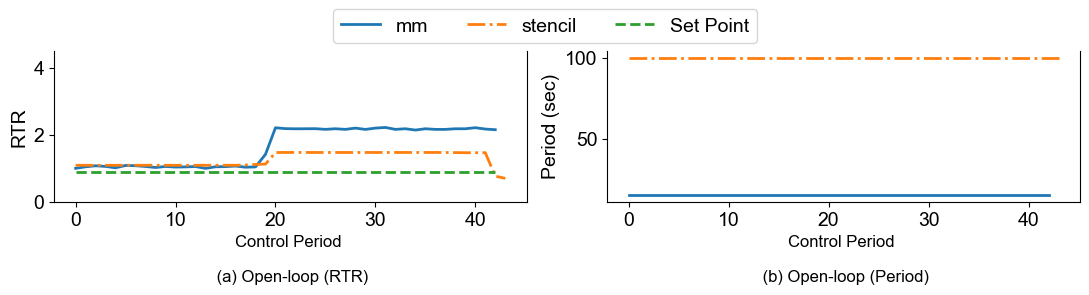

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Helper function to read data from a text file and convert to a list of floats
def read_data(file_path):
    with open(file_path, 'r') as f:
        return [float(line.strip()) for line in f.readlines()]

# -------------------- Read Data --------------------
# Open-loop RTR data
open_s1 = read_data('logs/s1.txt')
open_s2 = read_data('logs/s2.txt')
setpoint1_open = [0.90] * len(open_s1)

# Open-loop Period data
open_p1 = read_data('logs/p1.txt')
open_p2 = read_data('logs/p2.txt')

# -------------------- Define x-axis indices --------------------
# For RTR plots we use indices 5:50; for open-loop period, we use 0:50
idx_rtr = slice(5, 50)
idx_period_closed = slice(3, 50)
idx_rtr_closed = slice(5, 50)
idx_period_closed1 = slice(5, 50)
# -------------------- Create 1x4 Subplots --------------------
#fig, axs = plt.subplots(1, 4, figsize=(12, 3), sharex=False)
fig, axs = plt.subplots(1, 2, figsize=(11, 3), sharex=False)
print(open_s1[idx_rtr])
# Subplot 0: Open-Loop RTR
axs[0].plot(open_s1[idx_rtr], '-', linewidth=2, label='mm')
axs[0].plot(open_s2[idx_rtr], '-.', linewidth=2, label='stencil')
axs[0].plot(np.array(setpoint1_open)[idx_rtr], '--', linewidth=2, label='Set Point')
axs[0].set_ylabel('RTR', fontsize=14)
axs[0].set_xlabel('Control Period \n \n (a) Open-loop (RTR)', fontsize=12)
axs[0].set_ylim([0, 4.5])
axs[0].spines['top'].set_visible(False)

# Subplot 1: Open-Loop Period
axs[1].plot(open_p1[idx_rtr], '-', linewidth=2, label='mm')
axs[1].plot(open_p2[idx_rtr], '-.', linewidth=2, label='stencil')
axs[1].set_ylabel('Period (sec)', fontsize=14)
#axs[1].set_xlabel('Control Period \n \n (d) RTR step size 0.095', fontsize=12)
axs[1].set_xlabel('Control Period \n \n (b) Open-loop (Period)', fontsize=12)
axs[1].spines['top'].set_visible(False)


for ax in axs:
    ax.tick_params(axis='both', labelsize=14)
# Create one common legend (using handles from the Open-Loop RTR subplot)
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4, frameon=True, fontsize=14)

# Adjust layout to leave space at the top for the legend
plt.tight_layout(rect=[0, 0, 1, 0.88])
fig.savefig('figures/openloopfix.pdf', bbox_inches='tight', dpi=300, format='pdf')
